<h2>Table of Contents</h2>
<p>In this lab, we will cover logistic regression using PyTorch.</p>

<ul>
    <li><a href="#Log">Logistic Function</a></li>
    <li><a href="#Seq">Build a Logistic Regression Using nn.Sequential</a></li>
    <li><a href="#Model">Build Custom Modules</a></li>
</ul>
<p>Estimated Time Needed: <strong>15 min</strong></p>

<hr>


In [1]:
# Import the libraries we need for this lab

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 

In [2]:
# Set the random seed

torch.manual_seed(2)

## Logistic Function

In [3]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)
print("The tensor: ", z)

The tensor:  tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])


In [4]:
# Create sigmoid object

sig = nn.Sigmoid()

In [5]:
# Use sigmoid object to calculate the 

yhat = sig(z)

Text(0, 0.5, 'yhat')

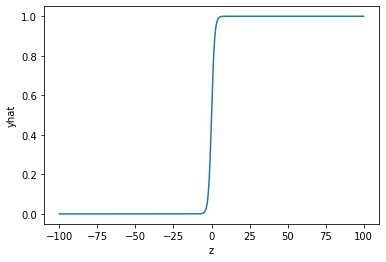

In [6]:
plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

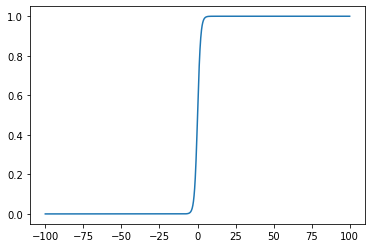

In [7]:
yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

## Build a Logistic Regression with nn.Squential

In [8]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[1.0], [100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[  1.],
        [100.]])


In [9]:
# Use sequential function to create model

model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

The object is represented in the following diagram: 

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_regression_block_diagram.png" width = 800, align = "center" alt="logistic regression block diagram" />


In [10]:
# Print the parameters

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.2294]], requires_grad=True), Parameter containing:
tensor([-0.2380], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[0.2294]])), ('0.bias', tensor([-0.2380]))])


In [11]:
# The prediction for x

yhat = model(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.4979]], grad_fn=<SigmoidBackward>)


Calling the object with tensor <code>X</code> performed the following operation <b>(code values may not be the same as the diagrams value  depending on the version of PyTorch) </b>:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_functio_example%20.png" width="400" alt="Logistic Example" />


In [12]:
# The prediction for X

yhat = model(X)
yhat

tensor([[0.4979],
        [1.0000]], grad_fn=<SigmoidBackward>)

In [19]:
# Create and print samples

x = torch.tensor([[1.0, 1.0]])
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
print('x = ', x.shape)
print('X = ', X.shape)

x =  torch.Size([1, 2])
X =  torch.Size([3, 2])


In [14]:
# Create new model using nn.sequential()

model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

The object will apply the Sigmoid function to the output of the linear function as shown in the following diagram:
<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1logistic_output.png" width="800" alt="The structure of nn.sequential"/>



In [15]:
# Print the parameters

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[ 0.1939, -0.0361]], requires_grad=True), Parameter containing:
tensor([0.3021], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[ 0.1939, -0.0361]])), ('0.bias', tensor([0.3021]))])


In [16]:
# Make the prediction of x

yhat = model(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.6130]], grad_fn=<SigmoidBackward>)


The operation is represented in the following diagram:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.1.logisticwithouptut.png" width="500" alt="Sequential Example" />


In [17]:
# The prediction of X

yhat = model(X)
print("The prediction: ", yhat)

The prediction:  tensor([[0.6130],
        [0.6044],
        [0.5957]], grad_fn=<SigmoidBackward>)


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_with_outputs2.png" width="800" alt="Sequential Example" />


## Build Custom Modules

In [22]:
#Create logistic regression custom class

class logistic_regression(nn.Module):
   # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [23]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[-100.],
        [   0.],
        [ 100.]])


In [24]:
# Create logistic regression model

model = logistic_regression(1)

In [28]:
# Print parameters 

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict()['linear.weight'].shape)

list(model.parameters()):
  [Parameter containing:
tensor([[0.2381]], requires_grad=True), Parameter containing:
tensor([-0.1149], requires_grad=True)]

model.state_dict():
  torch.Size([1, 1])


In [26]:
# Make the prediction of x

yhat = model(x)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.5307]], grad_fn=<SigmoidBackward>)


In [27]:
# Make the prediction of X

yhat = model(X)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[4.0805e-11],
        [4.7130e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)


In [29]:
# Create logistic regression model

model = logistic_regression(2)

In [30]:
# Create x and X tensor

x = torch.tensor([[1.0, 2.0]])
X = torch.tensor([[100, -100], [0.0, 0.0], [-100, 100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1., 2.]])
X =  tensor([[ 100., -100.],
        [   0.,    0.],
        [-100.,  100.]])


In [31]:
# Make the prediction of x

yhat = model(x)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.2943]], grad_fn=<SigmoidBackward>)


In [32]:
# Make the prediction of X

yhat = model(X)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[7.7529e-33],
        [3.4841e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)


<h3>Practice</h3>
Make your own model <code>my_model</code> as applying linear regression first and then logistic regression using <code>nn.Sequential()</code>. Print out your prediction.


In [33]:
# Practice: Make your model and make the prediction

X = torch.tensor([-10.0])

In [34]:
my_model = nn.Sequential(nn.Linear(1, 1),nn.Sigmoid())
yhat = my_model(X)
print("The prediction: ", yhat)

The prediction:  tensor([0.2231], grad_fn=<SigmoidBackward>)
